# Práctica 9 – Text Analysis (Word Cloud)

En esta práctica generaremos nubes de palabras (WordCloud) a partir del dataset `Anime_clean.csv`.

Usaremos columnas de texto como:
- Tags
- Name
- Description (si está disponible)

Objetivos:
- Limpiar texto
- Combinarlo
- Generar varias nubes de palabras


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

df = pd.read_csv("../data/Anime_clean.csv")
df.head()


,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1.0,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,24.0,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2.0,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3.0,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4.0,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5.0,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


In [3]:
df.columns


Index(['Rank', 'Name', 'Japanese_name', 'Type', 'Episodes', 'Studio',
       'Release_season', 'Tags', 'Rating', 'Release_year', 'End_year',
       'Description', 'Content_Warning', 'Related_Mange', 'Related_anime',
       'Voice_actors', 'staff'],
      dtype='object')

In [ ]:

df["Tags"] = df["Tags"].fillna("")

text_tags = " ".join(df["Tags"])
text_tags[:500]  


'Action, Adventure, Fantasy, Shounen, Demons, Historical, Martial Arts, Orphans, Siblings, Swordplay, Based on a Manga, Explicit Violence Drama, Fantasy, Romance, Shoujo, Animal Transformation, Contemporary Fantasy, Curse, Dysfunctional Families, Mental Illness, Orphans, Based on a Manga, Emotional Abuse,, Mature Themes,, Physical Abuse,, Suicide,, Violence,, Domestic Abuse Fantasy, Ancient China, Chinese Animation, Cultivation, Xianxia, Based on a Web Novel Action, Adventure, Drama, Fantasy, Mys'

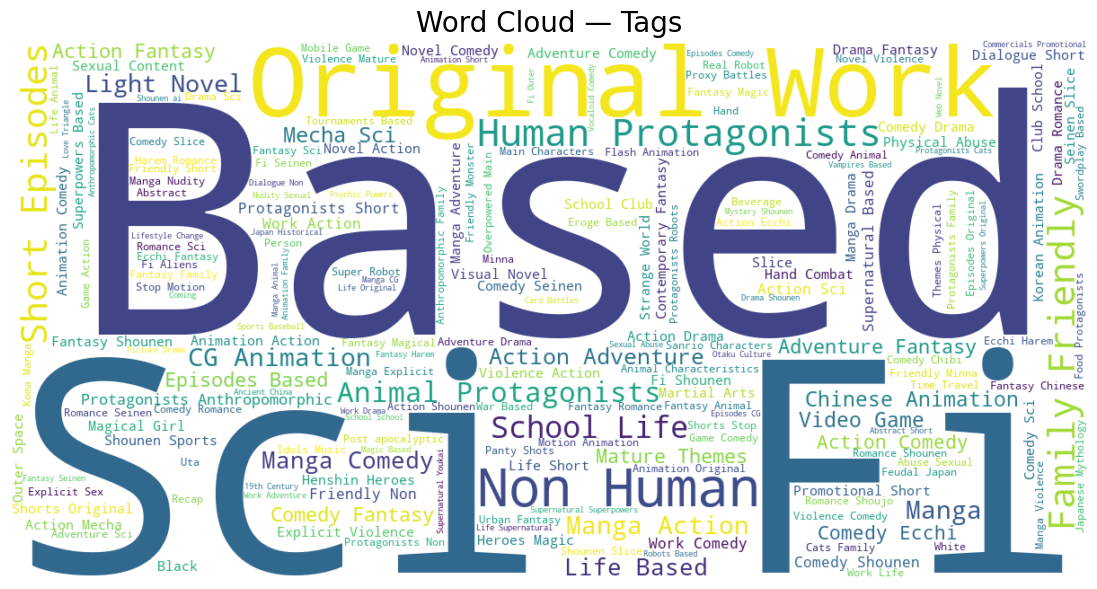

In [5]:
stopwords = set(STOPWORDS)

wc_tags = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    stopwords=stopwords
).generate(text_tags)

plt.figure(figsize=(14,7))
plt.imshow(wc_tags, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud — Tags", fontsize=20)
plt.show()


In [6]:
df["Name"] = df["Name"].fillna("")

text_names = " ".join(df["Name"])


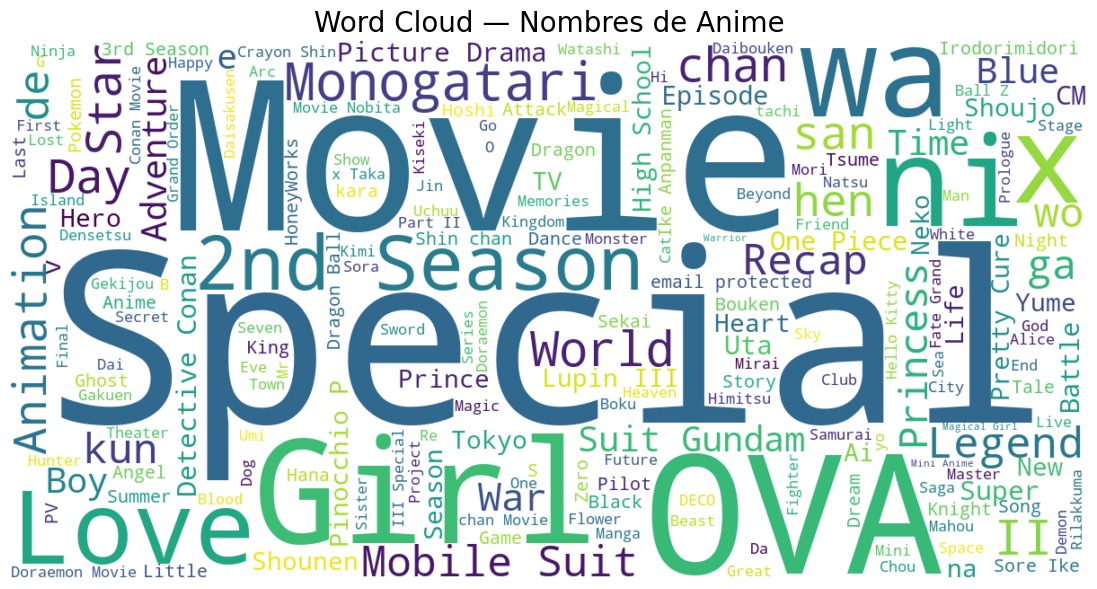

In [7]:
wc_names = WordCloud(
    width=1200, height=600, background_color="white"
).generate(text_names)

plt.figure(figsize=(14,7))
plt.imshow(wc_names, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud — Nombres de Anime", fontsize=20)
plt.show()


In [8]:
def categorize_rating(r):
    if r >= 8:
        return "Alta"
    elif r >= 6:
        return "Media"
    else:
        return "Baja"

df["Rating_Class"] = df["Rating"].apply(categorize_rating)

df["Rating_Class"].value_counts()


Rating_Class
Baja    15344
Name: count, dtype: int64

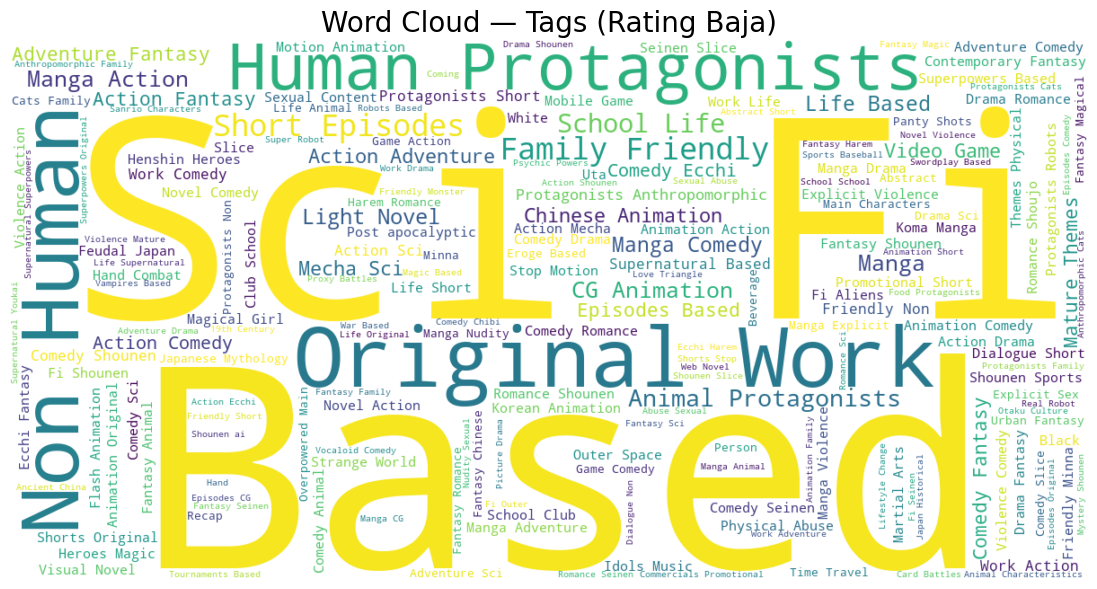

In [9]:
rating_classes = df["Rating_Class"].unique()

for rclass in rating_classes:
    subset = df[df["Rating_Class"] == rclass]
    subset_text = " ".join(subset["Tags"].fillna(""))

    wc = WordCloud(
        width=1200,
        height=600,
        background_color="white",
        stopwords=stopwords
    ).generate(subset_text)

    plt.figure(figsize=(14,7))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud — Tags (Rating {rclass})", fontsize=20)
    plt.show()
